# SMU 7331 Data Mining Project 2 - Shon Copy
##### Authors: Shon Mohsin, Heber Nielsen, Jose Torres, Lokesh Maganti

In [7]:
import math
import re
import statistics

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix, parallel_coordinates
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from IPython.display import display, HTML
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn.svm import SVC
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.20.1.


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
url = 'https://raw.githubusercontent.com/ShonTM/DataMiningProject1/master/Chilean%20Earthquake%20Perinatal%20Outcome_english_translation.csv'
df=pd.read_csv(url)

## Business Understanding:

Our selected data set was chosen because we had an interest in the topic of how major environmental disasters may affect the outcome of pregnancy. The data were collected for a study of the effect of a major earthquake on pregnancy outcomes, published in the scientific journal PLOS One. The reference for the published study is: _["Effects of earthquake on perinatal outcomes: A Chilean register-based study"](https://github.com/ShonTM/DataMiningProject1/blob/master/chile%20earthquake%20plos%20one%20paper.pdf)_  by Yasna K. Palmeiro-Silva, et al. The study authors reported the February 27, 2010 earthquake in Chile affected the perinatal outcomes of Chilean pregnant women. Medical groups who provide care for survivors of such a major natural disaster could use based on the data to determine optimal resource allocation and usage in caring for pregnancies and the resulting offspring following the event.

## Data Understanding:

The following description of the data gathering process and of the data themselves is a summary of information from Methods section of the published paper and from the repository site from which we downloaded the data file. The study authors collected data from two different years, 2009 and 2010. Women who were pregnant on February 27, 2010 (the date of the earthquake)were identified from clinic and hospital records in the region of Chile around the epicenter of the earthquake. These were the "experimental" group. The control group consisted of women from the same area who were pregnant on February 27 of the previous year. The original data set underwent some precleaning by the study authors. In their publication they indicated that they began with over 14,000 pegnancies/deliveries.  This original data set was not made publically available. The data set was then pre-cleaned by the authors, who removed instances they determined would not contribute to providing an answer to their main experimental question. Most of these instances were pregnancies ultimately delivered by cesarean section. Additionally, pregnancies that ended before 34 weeks of gestation, pregnancies that had infants with severe congenital anomalies, and pregnancies that did not result in a live-born child were removed. The published paper from the authors accounted for the majority, but not all of the instances that were removed. The author's final data set contained data on 4,076 pregnancies. 

All demographic and clinical information was abstracted and recorded by professional workers (medical doctors, midwives, and nurses). The data abstracted included: date of delivery, gestational age at delivery (in weeks), maternal age (in years), parity of mother, the place of residence, the gender of newborns, birth weight (in grams), length (in centimeters), head circumference (in centimeters), Apgar at 1 and 5 minutes, if small for gestational age (SGA) (defined as newborn birth weight <10th percentile for gestational age), ponderal index (weight/height3), preterm delivery (birth between 34–37 weeks). Gender of newborns, location of residence, gestational age (either in weeks or days), parity and maternal age were considered by the study authors as effect modifiers; location of residence was related to three categories of average annual income: low income (500,000 to 1 million Chilean pesos), middle income (1 to 1.5 million Chilean pesos) and high income (more than 1.5 million Chilean pesos). 

## Data Preparation:

The data were downloaded in a Stata file format (.ado) and were in Spanish. From within Stata we converted column names and string entries to their English values. We exported the converted file from Stata into a .CSV file format, after which all further work with the data set was done in Python. Our data cleaning required checking the consistency of the data and finding missing values. We found only 2 missing values, which we replaced using imputation (below). There were no other data set errors that we could identify.

#### Data Meaning Type

We first created a data code book that listed each variable the original Spanish variable name, our English translation equivalent, the data type as encoded in the original Stata file and an explanation of what the data entries represented and how they were encoded. This information is presented in the following lines:

id_clinica = Clinic_ID (numeric, long, nominal)
  <br>ID# of the medical clinic.

id_excel = Excel_File_ID (numeric, int, nominal )
<br>ID# of each data instance, apparently created before the authors eliminated "non-eligible" pregnancies/deliveries (see chart of data cleaning)

dia = Day (numeric, byte, ordinal)
<br> Day of the month the baby was born. 

mes = Month  (numeric, byte, ordinal)
<br>Month of birth of the infant (numeric)

ano = Year (numeric, int, ordinal)
<br>Year of birth

sexo = Sex (numeric, byte, nominal)
 <br>Values: Mujer = Female; Hombre = Male
<br>Sex of the infant. In the Stata data file these were converted to numeric values:
0 (hombre) =  male,   1 (mujer) = females

peso = Weight (numeric, int, continuous)
 <br>The birth weight of the infant, in grams, rounded to 1 gram

talla = Length (numeric, float, continuous)
<br>The length (i.e., height) of the baby in cm, rounded to 0.1 cm  "Talla" actually means "size" but this is the length measurement.

cc = Head_circ (Head circumference (numeric, float, continuous)
<br>The circumference of the head, measured at about the forehead/eyebrow level, in cm, rounded to 0.01 cm.

apgar = Apgar_1 (the Apgar score at one minute of life(numeric, byte, ordinal))
 <br>See apgar5 for complete explanation.

apgar5 = Apgar_5 (the Apgar score at five minutes of life(numeric, byte, ordinal))
<br>The Apgar score is a sum of five physiologic parameters each scored from zero to two. So the Apgar score can range from 0 to 10.  This score is routinely calculated for all newborn infants at 1 and 5 minutes of age. It is a clinical summary of how well a newborn is making the transition into life outside of the uterus. A "normal" score is 7 or more. Lower scores indicate a "difficult" transition, and may reflect either intrinsic or extrinsic factors that are affecting the infant.  While both scores are useful as a standardized documentation of  the transition process, only the 5 minute Apgar has some prediction  power for long term outcome. 

comuna = Municipality (numeric, byte, ordinal)
<br>They used Average Annual Income (in millions of Chilean Pesos) binned into 3 categories, to identify the "place of residence", using their  term from the publication.
 In the Stata data set this is given 3 values, defined as the following:
 0 = > 1.5 million (high incomel)
1 = 1.0 million to 1.5 million (medium income)
2 = 500,000 to 1.0 million (low income)

aeg = wgt_for_age (the baby's weight for gestational age (numeric, byte, continuous )
<br>Newborn babies are rated as being small for gestational age, appropriate for gestational age, or large for gestational age.   These designations come from population-based nomograms, and are a function of birth weight and the gestational age.  The designation is important because small for gestational age (SGA) and large for gestational age (LGA) babies are biomarkers of  risk for important problems in the first days of life. SGA is defined as <10%ile for gestational age. LGA is defined as >90%ile for gestational age. In the Stata data set these are designated as follows:
0 (aeg) = Appropriate for Gestational Age (AGA)
1 (Peg) = Small for Gestational Age (SGA)
2 (geg) = Large for Gestational Age (LGA)

eg = Gest_age (Gestational age (numeric, byte, continuous))
 <br>The gestational age of the child at birth. Given in completed weeks (i.e., 37 weeks plus 4 days is 37)

trim_exp = Trimester  (numeric, float, ordinal)
<br>Pregnancies are divided into thirds, called trimesters. This variable indicates the specific trimester (part) of the pregnancy that corresponded  to the date of the earthquake, whether in the quake year or in the control year. The study population is comprised of women who were   pregnant during the time of the earthquake, or at the same time of the year in the previous  year. This variable only classifies the  trimester against the time of year, irrespective of which year.  In the Stata data set this is given as follows:
1 (primero) = First 
2 (segundo) = Second 
3 (tercero) = Third 

bajo_peso = Low_birthwgt (Low birthweight (numeric, float, continuous))
<br>A different biomarker of a newborn's risk of problems at birth is whether the child is "Low Birthweight", routinely defined as <2500 grams at birth. It is an older and weaker means of identifying babies at risk of problems in the newborn period  than the size for gestational  age (above) or gestational age at birth (below) but it continues to be recorded in many studies of newborns. The Stata data set gives two  values:
0 = normal birthweight (sobre 2500)
1 = low birthweight (bajo 2500)

pretermino = Premature (numeric, float, nominal)
Designates a baby as having been born premature (less than 37 weeks of gestation). A stronger indicator of risk of problems in the newborn period than Low Birthweight. Values in Stata:
     0 = (sobre 37) = Not premature
    1 =  (34 - 37) = Premature

edad_mama = Maternal_age (numeric, float, continuous)
Age of the mother, in years.

paridad = Parity (numeric, float, continuous)
 <br>Parity is the number of live births the mother has had previous to this current baby. 

trim_exp_g = Trim_study (The trimester of pregnancy at the study interval for each year(numeric, int, ordinal)
<br>This variable breaks down the trim_exp variable into those who were in the control year and those who were in the earthquake year.  Stata gives 6 values, as follows:
1 = First trimester, year 2009 (primero2009)
2 = Second trimester, year 2009 (segundo2009)
3 = Third trimester, year 2009 (tercero2009)
4 = First trimester, year 2010 (primero2010)
5 = Second trimester, year 2010 (segundo2010)
6 = Third trimester, year 2010 (tercero2010)

pi = Ponderal_index (numeric, float, continuous)
<br>Used as a more complex measure of adequate or inadequate fetal growth. Calculated as weight in grams / length (or height) in cm cubed

exposed = Exposed (numeric, float, nominal)
<br>Whether or not the pregnancy was exposed to the earthquake, i.e. a control or experimental. Given as a number which Stata strangely does not define. We can define it by data inspection, as follows:
0 = Not exposed (control group)
1 = Exposed (earthquake group)

| Feature Name (Original)       | Feature Name (English) | Description               | Variable Type                |
| -----------------------------:| ----------------------:|--------------------------:|-----------------------------:|
| id_clinica                    | Clinic_ID              | ID# of the medical clinic | numeric                      |
| id_excel                      | Excel_File_ID          | ID# in original source    |                              |
| dia                           | Day                    | Day in birth month        | numeric                      |
| mes                           | Month                  | Birth month               | numeric                      |
| ano                           | Year                   | Birth year                | numeric                      |
| sex                           | Sex                    | Birth sex (Mujer/Hombre)  | numeric                      |
| peso                          | Weight                 | Birth weight in grams| numeric                           |
| talla                         | Length                 | Birth length in cm        | numeric                      |
| cc                            | Head_circ              | Head circumference in cm (eyebrow level) | numeric       |
| apgar                         | Apgar_1                | Apgar score 1 minute after birth | numeric               |
| apgar5                        | Apgar_5                | Apgar score 5 minutes after birth | numeric              |
| comuna                        | Municipality           | Avg. annual income in Chilean Pesos | numeric            |
| aeg                           | wgt_for_age            | Weight relative to gestational age | Categorical         |
| eg                            | Gest_age               | Gestational age at birth in weeks  | numeric             |
| trim_exp                      | Trimester              | Trimester on February 27 of either study year| numeric   |
| bajo_peso                     | Low_bthwgt             | Indicator for weight under 2500 grams | Categorical      |
| pretermino                    | Premature              | Indicator for gestation period less than 37 weeks | Categorical  |
| edad_mama                     | Maternal_Age           | Age of mother in years    | numeric                      |
| paridad                       | Parity                 | Number of previous live births by same mother | numeric  |
| trim_exp_g                    | Trim_study             | Trimester combined with study year (1-6)   | Categorical |
| pi                            | Pondural Index         | Calculation representing fetal growth | numeric          |
| exposed                       | Exposed                | Indicator of control or earthquake group | Categorical   |

One additional comment on APGAR scores.  APGAR is an acronym for the categories: Activity, Pulse, Grimace, Appearance, and Respiration.  It summarizes how well the newborn is making the transition to life outside the uterus.  Points are assigned to each each category based on level of activity observed, and range from 0 to 2.  The sum of all points (maximum score = 10) represents the APGAR score.


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 22 columns):
Clinic_ID         239 non-null float64
Excel_File_ID     4076 non-null int64
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null object
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
Apgar_1           4076 non-null int64
Apgar_5           4076 non-null int64
Municipality      4076 non-null object
wgt_for_age       4076 non-null object
Gest_age          4076 non-null int64
Trimester         4076 non-null object
Low_birthwgt      4076 non-null object
Premature         4076 non-null object
Maternal_age      4076 non-null int64
Parity            4074 non-null float64
Trim_study        4076 non-null object
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(5), int64(10), object(7)


,Clinic_ID,Excel_File_ID,Day,Month,Year,Weight,Length,Head_circ,Apgar_1,Apgar_5,Gest_age,Maternal_age,Parity,Ponderal_index,Exposed
count,239.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4074.000000,4076.000000,4076.000000
mean,397253.694561,3873.462709,15.374141,7.113837,2009.517664,3355.048086,49.696516,34.689463,8.767664,9.363837,38.802993,27.839794,0.611438,2.729498,0.517664
std,10793.012537,1683.392329,8.736868,2.762731,0.499749,384.896728,1.723517,1.187216,0.730237,0.521778,1.074730,5.380683,0.782184,0.228661,0.499749
min,234079.000000,994.000000,1.000000,2.000000,2009.000000,1790.000000,40.000000,29.000000,2.000000,6.000000,34.000000,14.000000,0.000000,1.696000,0.000000
25%,397677.500000,2385.000000,8.000000,5.000000,2009.000000,3098.750000,48.500000,34.000000,9.000000,9.000000,38.000000,24.000000,0.000000,2.579992,0.000000
50%,398497.000000,3843.500000,15.000000,7.000000,2010.000000,3345.000000,50.000000,35.000000,9.000000,9.000000,39.000000,28.000000,0.000000,2.717342,1.000000
75%,399335.000000,5339.250000,23.000000,10.000000,2010.000000,3610.000000,51.000000,35.500000,9.000000,10.000000,40.000000,31.000000,1.000000,2.866328,1.000000
max,400453.000000,6966.000000,31.000000,12.000000,2010.000000,4890.000000,56.000000,40.000000,10.000000,10.000000,41.000000,44.000000,5.000000,5.283747,1.000000


One additional comment on APGAR scores.  APGAR is an acronym for the categories: Activity, Pulse, Grimace, Appearance, and Respiration.  It summarizes how well the newborn is making the transition to life outside the uterus.  Points are assigned to each each category based on level of activity observed, and range from 0 to 2.  The sum of all points (maximum score = 10) represents the APGAR score.

## Data Quality

We cleaned and prepared the data set for analysis as described in the following code and commentary on the quality of this data set.

### Missing Values
The variables `Clinic_ID` and `Excel_File_ID` are dropped at the start, because they are not helpful for analysis. We found two missing values, entered as  `NaN`, in `Parity`. We repaired these by imputing with the value of the mode, which was '0'. 

### Duplicates

We found `0` duplicates in this data set (see next cell).

### Outliers

We identified 3 potential outliers in the variable 'Ponderal_index' as seen on a scatter plot of `Weight` vs `Ponderal_index` These outlier values are from newborns whose lengths were much smaller than expected given their weight (more than 4 standard deviations above the mean). This is discussed further in the "Revisiting Outliers" section.

In [11]:
#Data Cleanup - Dropping unnecessary columns, replacing NaNs, and fixing column names
print('Dropping columns Clinic_ID and Excel_File_ID...')
print('Replacing NaN values in \'Parity\' with 0...')
print('Renaming Lenght column to Length..')

#drop "Clinic_ID" and "Excel_File_ID" from dataframe
df.drop('Clinic_ID', axis=1, inplace=True, errors='ignore')
df.drop('Excel_File_ID', axis=1, inplace=True, errors='ignore')


#identify records with missing values
#display(df.iloc[df['Parity'].isna().get_values(),:].transpose() \
#           .style.highlight_null(null_color='red'))

#replace NaN in Parity with 0, which is the most common label
df['Parity'].fillna(0, inplace=True)


#rename length column
df.rename(columns={'Lenght': 'Length'}, inplace=True)

Dropping columns Clinic_ID and Excel_File_ID...
Replacing NaN values in 'Parity' with 0...
Renaming Lenght column to Length..


In [12]:
print('There are {} duplicated records.'.format(df.duplicated().sum()))

There are 0 duplicated records.


### Final Dataset

We take a look at the final dataset that we will use for our analysis. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 20 columns):
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null object
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
Apgar_1           4076 non-null int64
Apgar_5           4076 non-null int64
Municipality      4076 non-null object
wgt_for_age       4076 non-null object
Gest_age          4076 non-null int64
Trimester         4076 non-null object
Low_birthwgt      4076 non-null object
Premature         4076 non-null object
Maternal_age      4076 non-null int64
Parity            4076 non-null float64
Trim_study        4076 non-null object
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(4), int64(9), object(7)
memory usage: 637.0+ KB


### Modelling and Evaluation Part 1

Categorical variables identified: `Sex`, `Municipality`, `wgt_for_age`, `Trimester`, `Low_birthwgt`, `Premature`, `Trim_study`, `Parity`, `Exposed`, `Apgar_1`, `Apgar_5`, `Gest_age`

Continuous variables identified: `Weight`, `Length`, `Head_circ`, `Maternal_age`, `Ponderal_index`

In [14]:
#ignore some columns
columns_ignore = ['Day', 'Month', 'Year']
df_lite = df.drop(columns_ignore, axis=1)

#map some categorical variables to work with parallel coordinate plots and have a more natural ordering
df_lite['Sex'] = df_lite['Sex'].map({'female': 0, 'male': 1})
df_lite['Premature'] = df_lite['Premature'].map({'Premature': 1, 'Not premature': 0})
df_lite['Trim_study'] = df_lite['Trim_study'].map({'First2009': '1', 'Second2009': '2', 'Third2009': '3', 
                          'First2010': '4', 'Second2010': '5', 'Third2010': '6' })

#get list of categorical variables
categories = list(df_lite.columns[df_lite.dtypes == 'object']) \
                    + ['Parity', 'Apgar_1', 'Apgar_5', 'Exposed', 'Sex', 'Premature', 'Gest_age']
continuous = [col for col in df_lite.columns if col not in categories]

#confirm list of categorical variables
print('Categorical variables: {}\n'.format(categories))
print('Continuous variables: {}\n'.format(continuous))

#change data type for categorical variables to pandas 'category' type
df_lite[categories] = df_lite[categories].astype('category')


Categorical variables: ['Municipality', 'wgt_for_age', 'Trimester', 'Low_birthwgt', 'Trim_study', 'Parity', 'Apgar_1', 'Apgar_5', 'Exposed', 'Sex', 'Premature', 'Gest_age']

Continuous variables: ['Weight', 'Length', 'Head_circ', 'Maternal_age', 'Ponderal_index']



## Summary Statistics and Commentary ##

It is important to look at measurements of centrality and dispersion, such as mean and standard deviation, to help identify distributions and that observed values match prior expectations for those variables.

### Main Observations ###

We have used range, variability, and correlations for the major evaluation metrics. The variables in our study are ones for which there are well-established overall population norms, including ranges and variability. It is important for us to look at measurements of centrality and dispersion, such as mean and standard deviation, to help identify distributions and establish that observed values match prior expectations for those measures. Finding values that are outside of defined and established ranges (such as a pregnancy lasting more than ~43 weeks, or an Apgar score of 12, or a birth weight of 25 lbs) indicates errors in data entry. Finding that variability markedly exceeds established norms may indicate that this is not a homogeneous population, making any observations based on the population questionable. Finally, it is reasonable to expect that some of our variables are correlated, since pregnancy and newborn data have many interdependencies of biology and definition. We should check to assure that if we choose to retain strongly correlated variables there are stronger reasons for doing so, and remove those for which there are not strong justfications.

#### Observations for continuous variables:

In [15]:
print('Summary Statistics for Continuous Features:')
display(df_lite[continuous].describe())

Summary Statistics for Continuous Features:


,Weight,Length,Head_circ,Maternal_age,Ponderal_index
count,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000
mean,3355.048086,49.696516,34.689463,27.839794,2.729498
std,384.896728,1.723517,1.187216,5.380683,0.228661
min,1790.000000,40.000000,29.000000,14.000000,1.696000
25%,3098.750000,48.500000,34.000000,24.000000,2.579992
50%,3345.000000,50.000000,35.000000,28.000000,2.717342
75%,3610.000000,51.000000,35.500000,31.000000,2.866328
max,4890.000000,56.000000,40.000000,44.000000,5.283747


The values for `weight` are scaled much larger  with a larger range than the other continuous variables. This is due to the unit of measurement (grams) and the fact that over the range in gestational age at birth (6 weeks) the birth weight can vary by more than 2,000 grams. The values for 'weight" should be normalized before fitting any statistical models that use distance-based measurements for error.

#### Observations for categorical variables:

In [16]:
print('Summary Statistics for Categorical Features:')
display(df_lite[categories].describe())

Summary Statistics for Categorical Features:


,Municipality,wgt_for_age,Trimester,Low_birthwgt,Trim_study,Parity,Apgar_1,Apgar_5,Exposed,Sex,Premature,Gest_age
count,4076,4076,4076,4076,4076,4076.0,4076,4076,4076,4076,4076,4076
unique,3,3,3,2,6,6.0,9,5,2,2,2,8
top,500-1mill,aeg,First,normal birthweight,4,0.0,9,9,1,0,0,39
freq,2280,3581,1371,4022,758,2203.0,3405,2456,2110,2087,3961,1612


Most categorical variables have only a few categories (2 or 3)

### Correlation ###
- A few continuous variables appear approximately Normally distributed (e.g. `weight`, and `head_circ`), and all appear to be symmetric

- The correlation scores in the data frame below show strongest linear correlation for the following pairs:
 - corr(`weight`,`length`) = .72, 
 - corr(`weight`, `head_circ`) = .61
 - corr(`length`, `head_circ`) = .49
 - corr(`weight`, `ponderal_index`) = .49
 
We expect these strong correlations because this is known information. Our analysis confirms the biological fact that length, weight, and head circumference have correlatory relationships, as each is a measure of a seperate aspect of total body growth.  Ponderal_index is a direct function of weight and length. Because length and weight are used to calculate the Ponderal_index, these two can be removed and Ponderal_index retained, or vice-versa. All three should not be kept. However, although head circumference is normally correlated with growth it usually represents a separate measure, that of brain growth, and body growth can be normal when brain growth is not normal. Therefore head circumference should be retained along with Ponderal_index. Overall, the correlations do not reveal any surprising relationships.

In [17]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
display(df_lite.corr().style.background_gradient('coolwarm'))

,Weight,Length,Head_circ,Maternal_age,Ponderal_index
Weight,1,0.722646,0.607322,0.0611526,0.48568
Length,0.722646,1,0.486965,0.0488968,-0.246581
Head_circ,0.607322,0.486965,1,0.0667801,0.238798
Maternal_age,0.0611526,0.0488968,0.0667801,1,0.0211695
Ponderal_index,0.48568,-0.246581,0.238798,0.0211695,1


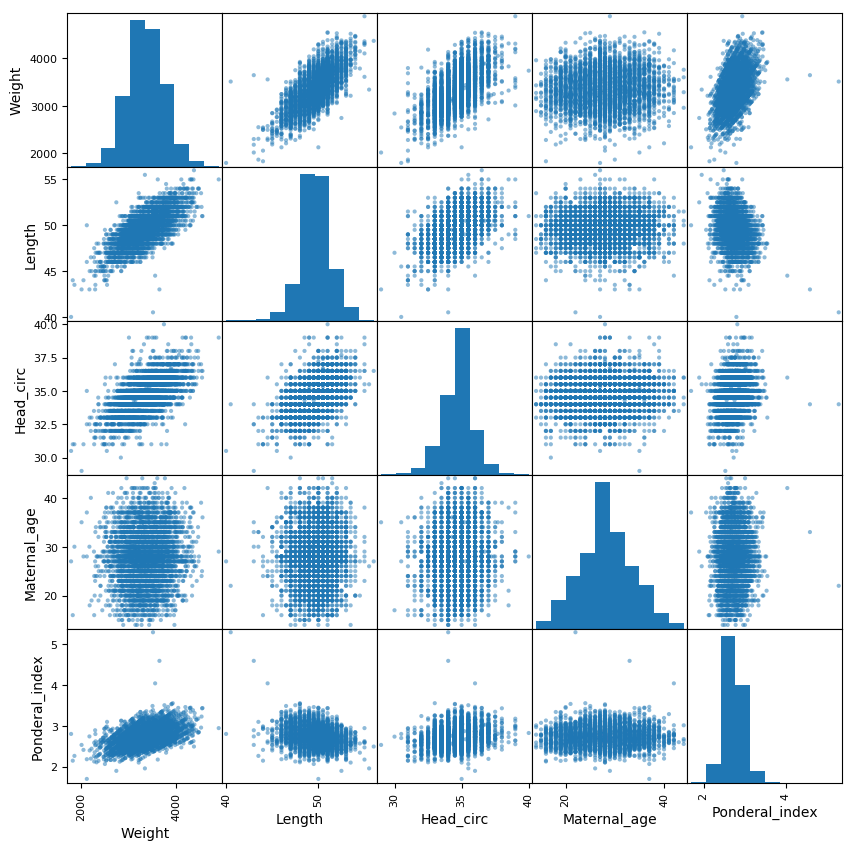

In [112]:
plt.style.use('default')
ax = scatter_matrix(df_lite,figsize=(10, 10))

We created distribution plots below to evaluate the continuous variables in a little more detail than the correlogram above.  `Weight` and `Ponderal_index` have the most bell-shaped curve. An interesting observation is the `Head_circ` distribution which shows a double peak with smaller peaks on each side. Differences in `Head_circ` are known to reflect difference in brain growth. The double peaks might be evidence of the presence of two underlying populations that differ in exposure to something that affected brain growth, or might be noise that would resolve with a much larger data sample. Further analysis is warranted to discern any meaningful relationship to explain the peaks and valleys. 

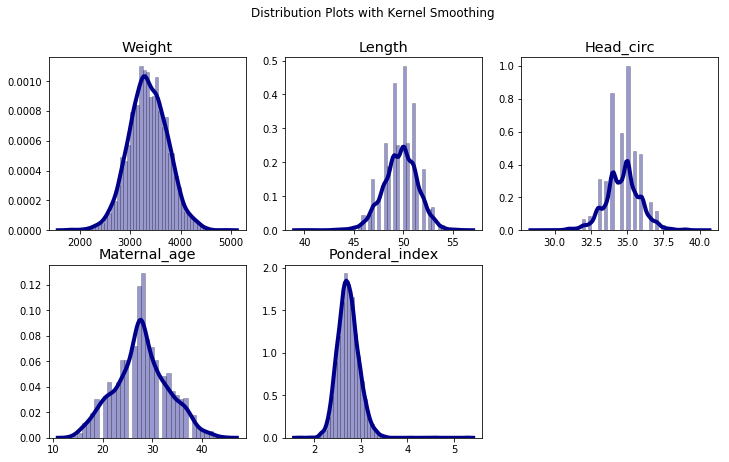

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,7))
plt.style.use('ggplot')
plt.suptitle('Distribution Plots with Kernel Smoothing')

#plot each cross tabulation (% is relative to total newborns in a variable category)
independent_features = continuous
for idx in range(len(independent_features)):
    row = int(idx / 3)
    col = int(idx % 3)
    sns.distplot(df_lite[independent_features].iloc[:,idx],
                               hist=True,kde=True,color='darkblue',
                               hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4}, ax=ax[row,col])
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')

ax[1,2].set_visible(False)
#df_lite[continuous].apply(lambda x: plothist(x), axis=0)

To visualize the parallel coordinates, we changed the scale to normalize values for the dataset. 

From the output, we see that there is a stonger tendency for babies born after exposure to be mildly premature compared to babies born before exposure. This is interesting as we observe no other reason for this anomaly. However, causation does not equate to correlation, and further analysis must be pursued to determine if the exposure can be an explanation of this difference.

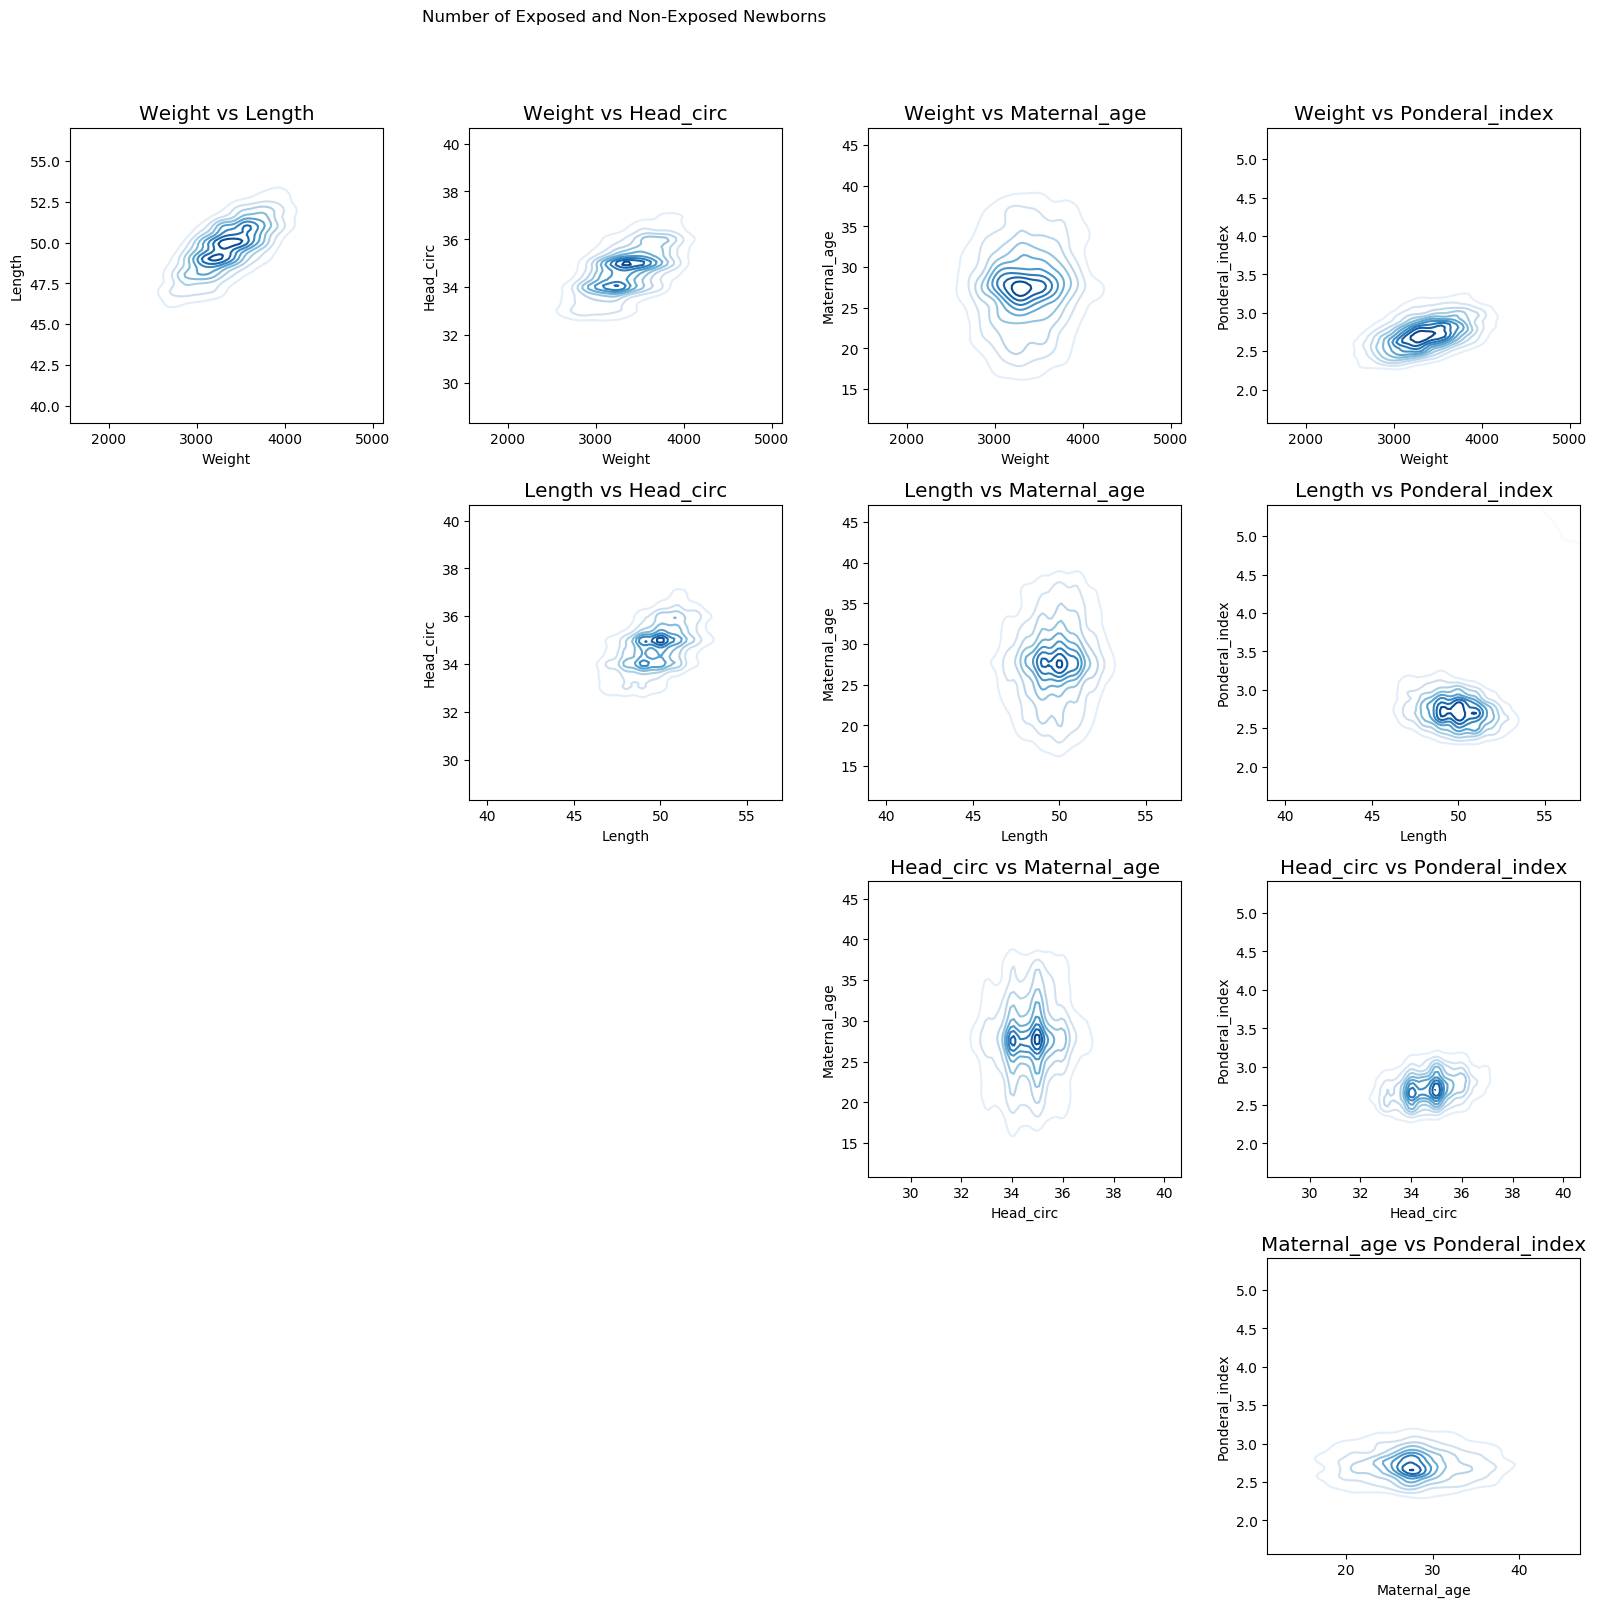

In [113]:
#Show how balanced the counts are across categorical variables
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
plt.style.use('ggplot')
#sns.set(style="white")
plt.suptitle('Number of Exposed and Non-Exposed Newborns')

for i in range(len(continuous)):
    for j in range(i+1, len(continuous)):
        sns.kdeplot(data=df_lite[continuous].iloc[:,i], 
                            data2=df_lite[continuous].iloc[:,j], ax=ax[i, j], shade_lowest=False, cmap='Blues')
        ax[i,j].set_title('{} vs {}'.format(continuous[i],continuous[j]))

#adjust tight_layout to avoid title clipping
fig.tight_layout(rect=[0, 0, 1, .94])

for i in range(5):
    for j in range(i+1):
        ax[i,j].set_visible(False)

plt.show()

Of further interest, when we look a little closer at correlation using bivariate contour plots, we see that there are a few cases with multiple density maxima, such as for `weight vs Head_circ` and `Head_circ` vs `Ponderal_index`. (Density maxima define a point process in which the fundamental quantity is the set of positions which are local maxima of the density field). These observations suggest areas for more extensive evaluation for further hypothesis testing.

### Revisiting Outliers ###

There are 3 outliers seen in the `weight` vs `Ponderal_index` scatterplot.  Examination of the specific entries show that are newborns who were short and heavy, that is, whose lengths were much smaller than would be expected given their weight (more than 3 standard deviations away from the mean).  Since `Ponderal_index` is inversely proportional to Length^3, it is therefore unusually high for these 3 short babies. Since any genetic-related information is not captured in the data, and there are valid reasons why that the data values could be found within the study population (for example, the native American population in Chile is much shorter than those with European ancestry), we do not drop the outliers.  There are several factors that may cause these outlier values which may be observed with a larger dataset from this population. 

These potential outliers are identified in the plot below (in blue).

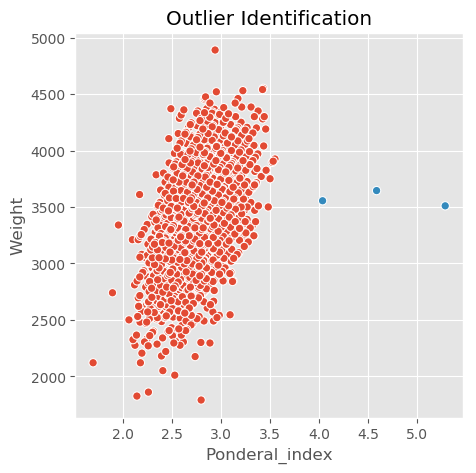

In [114]:
x = df_lite['Ponderal_index']
y = df_lite['Weight']
c = df_lite['Ponderal_index'] >= 4.0

plt.figure(figsize=(5,5))
plt.style.use('ggplot')

ax = sns.scatterplot(x,y,hue=c)
ax.legend().set_visible(False)
ax.set_title('Outlier Identification')
plt.show()

### Statistical Comparisons ###

Our target variable when we do our modeling will be the binary "Exposed" variable. To look at this variable, we divide our buckets by the binary 'Exposed' column to see if there are visually discernable observations that are evident between infants that were born before the earthquake or after the earthquake. 

Using the continuous variables, we examined means, medians, standard deviations, quartiles and ranges by exposure group, as well as the differences in means.  We see that the % change in the mean of each variable for Exposed babies is a slight decrease for the newborn measurements, and an increase in maternal age and ponderal index. We used histograms to represent the distributions of variables between the "Exposed" binary categories of Exposed and Not Exposed. 

In [115]:
#mean values of target variables grouped by exposure to earthquake
summary_df = df_lite.groupby(by='Exposed').agg([np.mean, np.median, np.std]).transpose()
summary_df.columns = ['Not Exposed', 'Exposed']
summary_df['Difference'] = summary_df['Exposed'] - summary_df['Not Exposed']
summary_df['Difference %'] = summary_df['Difference'] / summary_df['Not Exposed'] * 100
summary_df.reset_index(inplace=True)
summary_df.columns = ['Variable', 'Statistic', 'Not Exposed', 'Exposed', 'Difference', 'Difference %']
summary_df

,Variable,Statistic,Not Exposed,Exposed,Difference,Difference %
0,Weight,mean,3358.002035,3352.295735,-5.706300,-0.169931
1,Weight,median,3345.000000,3345.000000,0.000000,0.000000
2,Weight,std,377.199664,392.001798,14.802134,3.924217
3,Length,mean,49.894354,49.512180,-0.382174,-0.765966
4,Length,median,50.000000,49.500000,-0.500000,-1.000000
5,Length,std,1.625441,1.790939,0.165497,10.181691
6,Head_circ,mean,34.752238,34.630972,-0.121266,-0.348946
7,Head_circ,median,35.000000,34.500000,-0.500000,-1.428571
8,Head_circ,std,1.166475,1.203553,0.037077,3.178593
9,Maternal_age,mean,27.573245,28.088152,0.514906,1.867413


When we look at the distribution of newborns for each category in `Sex`, `Wealth`, `Trimester`, and `Parity` variables, we see the non-exposed (red) and exposed (blue) classes are **balanced** across all categories of all variables.  

These plots are interpreted by first picking a categorical variable, say Sex, then pick a category, say Female.  Of all Females, the red bar represents the number that were exposed.  The blue bar is the number that were not exposed.

Similar bar heights confirm the proportion of exposed newborns is similar to the proportion of non-exposed newborns. Thus, statistics computed for each category for exposed babies and non-exposed babies have a similar number of observations. Further anaylysis is needed to see if the differences observed between exposed and non-exposed are statistically significant. 

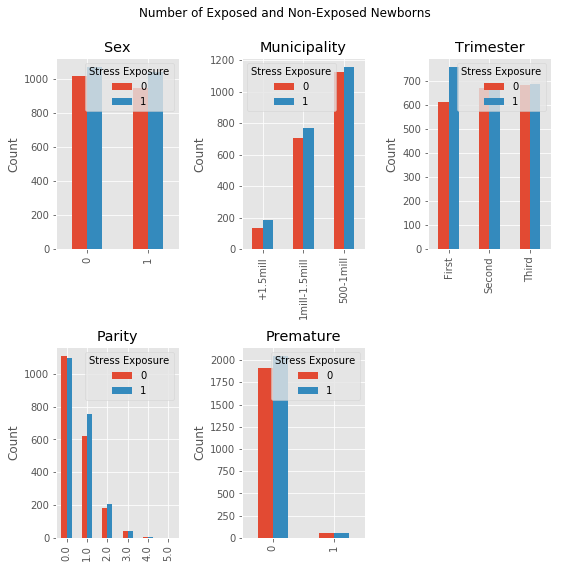

In [51]:
#Show how balanced the counts are across categorical variables
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8,8))
plt.style.use('ggplot')
plt.suptitle('Number of Exposed and Non-Exposed Newborns')

#plot each cross tabulation (% is relative to total newborns in a variable category)
independent_features = ['Sex', 'Municipality', 'Trimester', 'Parity', 'Premature']
for idx in range(len(independent_features)):
    row = int(idx / 3)
    col = int(idx % 3)
    pd.crosstab(index=df_lite[independent_features[idx]],columns=df_lite['Exposed'],
                colnames=['Stress Exposure']).plot(kind='bar', ax=ax[row,col])
    ax[row,col].set_ylabel('Count')
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')

#adjust tight_layout to avoid title clipping
fig.tight_layout(rect=[0, 0, 1, .94])
ax[1,2].set_visible(False)

plt.show()

To visualize the parallel coordinates, we changed the scale to normalize values for the dataset. 

From the output, we see that there is a stonger tendency for babies born after exposure to be mildly premature compared to babies born before exposure. This is interesting as we observe no other reason for this anomaly. However, causation does not equate to correlation, and further analysis must be pursued to determine if the exposure can be an explanation of this difference.

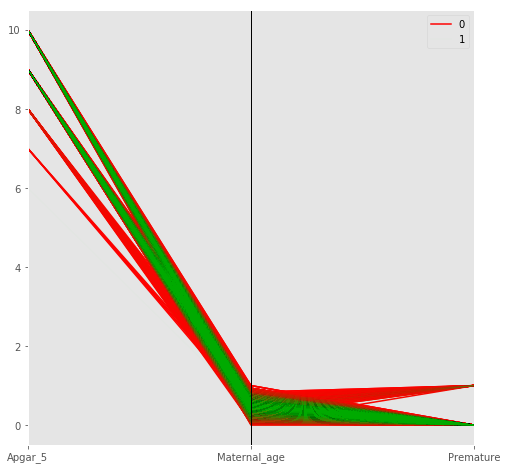

In [52]:
# Plot of parallel coordinates. 

plt.close('all')
plt.figure(figsize=(8,8))

df_normalized = (df_lite[continuous] - df_lite[continuous].min()) / (df_lite[continuous].max() - df_lite[continuous].min())
df_normalized['Exposed'] = df_lite['Exposed']
df_normalized['Trim_study'] = df_lite['Trim_study']
df_normalized['Premature'] = df_lite['Premature']
#df_normalized['Sex'] = df_lite['Sex'].map({'female': 0, 'male': 1})
df_normalized['Apgar_5'] = df_lite['Apgar_5']
parallel_coordinates(df_normalized.loc[:,['Exposed', 'Apgar_5', 'Maternal_age', 'Premature']], 'Exposed',color=[[1,0,0,1],[0,1,0,.01]])

We compare box plots to understand the differences in weight categorized by trimester and sex.  Observing the box plot, we see two patterns:
+ Exposure in the second trimester produces more outliers in weight.
+ Exposed males tend to weigh less
+ Exposed premature babies appearing to weigh less than non-exposed premature babies

Next, we compare box plots to understand the differences in maternal age by trimester, baby's sex, and premature status.  Observing the box plot, we see two patterns:

+ Exposed babies tend to have older mothers than non-exposed babies
+ Premature exposed babies have a higher proportion of younger mothers than non-premature exposed babies

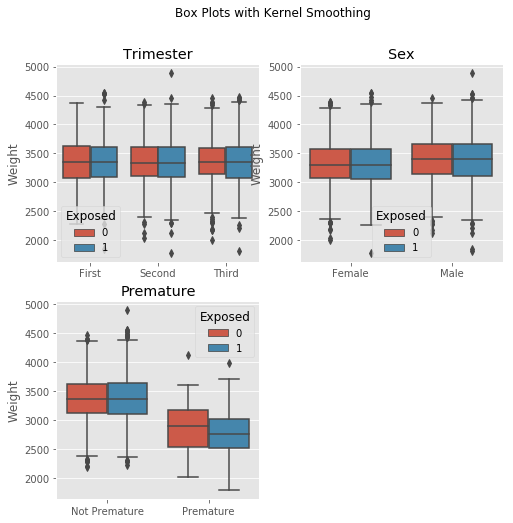

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
plt.style.use('ggplot')
plt.suptitle('Box Plots with Kernel Smoothing')

independent_features = ['Trimester', 'Sex', 'Premature']
for idx in range(len(independent_features)):
    row = int(idx / 2)
    col = int(idx % 2)
    sns.boxplot(x=independent_features[idx], y='Weight', hue='Exposed', data=df_lite, ax=ax[row,col])
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')
    
ax[0,1].set_xticklabels(labels = ['Female','Male'])
ax[1,0].set_xticklabels(labels = ['Not Premature','Premature'])
ax[1,1].set_visible(False)
plt.show()

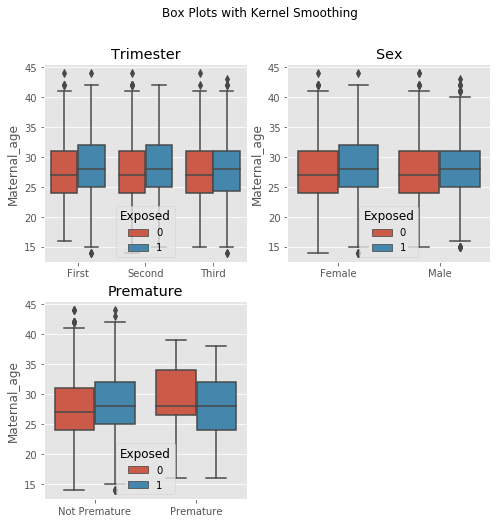

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
plt.style.use('ggplot')
plt.suptitle('Box Plots with Kernel Smoothing')

#plot each cross tabulation (% is relative to total newborns in a variable category)
independent_features = ['Trimester', 'Sex', 'Premature']
for idx in range(len(independent_features)):
    row = int(idx / 2)
    col = int(idx % 2)
    sns.boxplot(x=independent_features[idx], y='Maternal_age', hue='Exposed', data=df_lite, ax=ax[row,col])
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')
    
ax[0,1].set_xticklabels(labels = ['Female','Male'])
ax[1,0].set_xticklabels(labels = ['Not Premature','Premature'])
ax[1,1].set_visible(False)
plt.show()

We also created violin plots, which add more information about the distribution shape of a variable than can be seen with box plots.  An interesting example is the Ponderal_index and apgar_ plot. An Apgar score of 7 shows a much broader distribution across the ponderal index in the exposed babies. Further studies should address the relationship of earthquake-induced stress in pregnancy and the success of adaptation to extra-uterine life. 

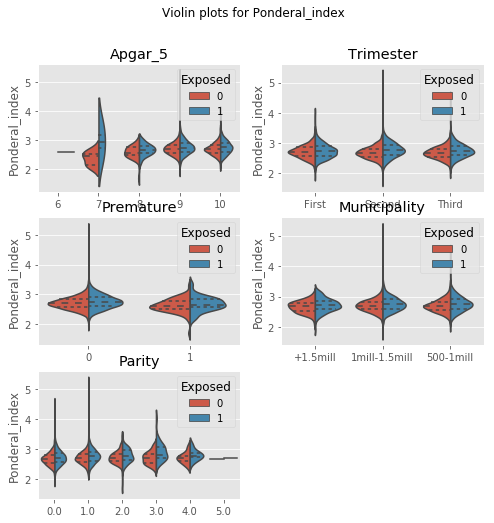

In [54]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,8))
plt.style.use('ggplot')
plt.suptitle('Violin plots for Ponderal_index')

#plot each cross tabulation (% is relative to total newborns in a variable category)
independent_features = ['Apgar_5', 'Trimester', 'Premature', 'Municipality', 'Parity']
for idx in range(len(independent_features)):
    row = int(idx / 2)
    col = int(idx % 2)
    sns.violinplot (df_lite[independent_features[idx]], df_lite['Ponderal_index'], 
                    df_lite['Exposed'], inner = "quartile", split = True, ax=ax[row, col])
    ax[row,col].set_title(independent_features[idx])
    ax[row,col].set_xlabel('')
    
#ax[0,1].set_xticklabels(labels = ['Female','Male'])
#ax[1,0].set_xticklabels(labels = ['Not Premature','Premature'])
ax[2,1].set_visible(False)
plt.show()

## Additional Features ##

Infant weight and length are used as inputs for the Ponderal index score.  
Other potential new features could be:
+ Discretizing some of the continuous variables into categories with larger differences (e.g. small/mid/large length)
+ Convert the APGAR scores into the meaningful categories that the numbers represent:
 + 0-3 = Severely depressed infant
 + 4-6 = Moderately depressed infant
 + or 7-10 = Excellent condition


## Principal Components Visualizations ## 

These visualizations help us further udnerstand the overall picture of the data. 

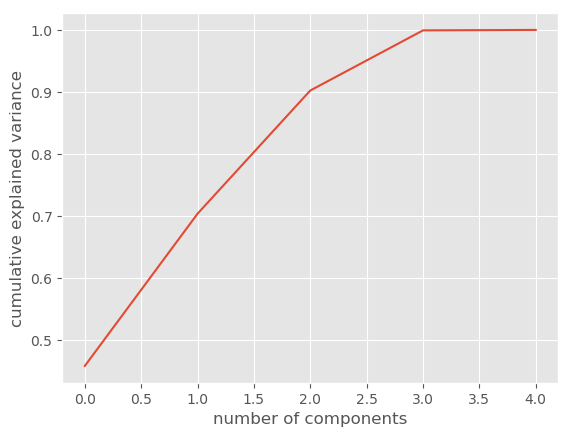

In [122]:
X = StandardScaler().fit_transform(df_lite[continuous].values)
y = df_lite[['Exposed']].values

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA Projection to smaller number of variables
#I chose 2 components because only a 2-dimensional plot is being done.

pca = PCA(n_components=2)
X_prin = pca.fit_transform(X)
principalDf = pd.DataFrame(data = np.concatenate((X_prin,y), axis=1),
                          columns = ['principal component 1', 'principal component 2', 'Exposed'])

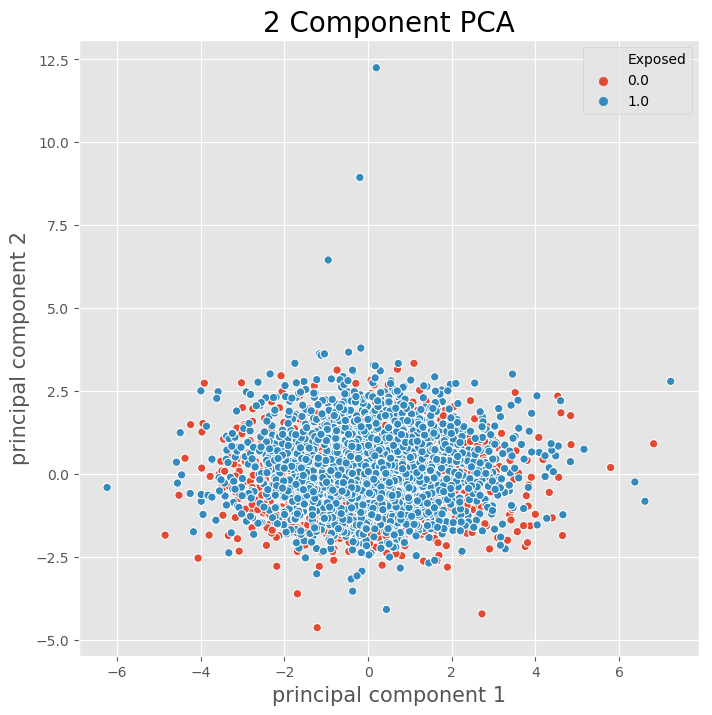

In [123]:
##Visualize the Projection
#Use a PcA projection to 2D to visualize the entire data set.
#Plot different classes using different colors or shapes.
#Do the classes seem well-seperated from each other?

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


sns.scatterplot(x=principalDf.iloc[:,0], y=principalDf.iloc[:,1], hue=principalDf.iloc[:,2])
plt.show()

# Modeling and Evaluation part 2:
This section details the preparation, training, testing, and model evaluations for the different models we will utilize. 

In our modelling, we want to answer 2 specific questions. 

1. Can we build a model to determine if the newborn was exposed or not exposed to the event (the earthquake) given our dataset?
2. Can we build a model that classifies if the newborn was born into a low income or high income household?

### Splitting of data into train and test sets
We began by creating pipeline functions to facilitate the process of creating different models, namely Stratefied K Fold, Logistic Regression, Linear Support Vector Correlation, Naive Bayes, and Ensemble AdaBoost Classifier. We used 10-fold Cross Validation to split the data into training and testing groups. This method is appropriate for the type of data we have (the instances are individual independent persons, with observations that are not time-dependent, some of which have some interdependence. 

### Model Pipeline Functions

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

#Creating feature and target matrix for 1st classification task
categories_ = categories.copy()
categories_.remove('Exposed')
categories_.remove('Trim_study')

X_continuous = (StandardScaler()
                .fit_transform(df_lite[continuous].values))

X_categorical = (OneHotEncoder(
                categories='auto', sparse=False)
                 .fit_transform(df_lite[categories_].values))

X = np.concatenate((X_continuous, X_categorical), axis=1)
y = df_lite[['Exposed']].values.reshape(-1)

#Creating feature and target matrix for 2nd classification task
categories_ = categories.copy()
categories_.remove('Trim_study')
categories_.remove('Municipality')

X_continuous_muni = (StandardScaler()
                .fit_transform(df_lite[continuous].values))

X_categorical_muni = (OneHotEncoder(
                categories='auto', sparse=False)
                 .fit_transform(df_lite[categories_].values))

X_muni = np.concatenate((X_continuous_muni, X_categorical_muni), axis=1)

#Map income to two classes for second classification task
y_muni = (df_lite['Municipality']
          .map({'500-1mill': 0, '1mill-1.5mill': 1, '+1.5mill': 1})
          .values
          .reshape(-1))

def plot_roc(y_true, y_predprob):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    
# Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_predprob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue',
             lw=2, label='ROC curve - Trapezoidal Rule (area = {})'.format(round(roc_auc,4)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

def train_models(X, y, models, test_data=[], preds=False):
    models = { name: { 'model': model.fit(X, y) } for name, model in models.items() }
    if preds == True:
        for name, model in models.items():
            models[name]['predictions'] = models[name]['model'].predict(test_data) 
    return models

def eval_models(models, data, y_actual):
    score_names = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    results = pd.DataFrame(columns=['model_name','score_name','score_value'])
    for model_name, model in models.items():
        scores = []
        y_hat = model['model'].predict(data)
        
        scores.append(accuracy_score(y_actual, y_hat))
        scores.append(precision_score(y_actual, y_hat))
        scores.append(recall_score(y_actual, y_hat))
        scores.append(f1_score(y_actual, y_hat))
        scores.append(roc_auc_score(y_actual, y_hat))
        
        temp_df = pd.DataFrame(
                    columns=['model_name','score_name','score_value'],
                    data=[(model_name, score_names[idx], scores[idx]) for idx in range(len(scores))])
        
        results = pd.concat([results, temp_df])
        
        
    return results

## Model Selection and Evaluation

### Support Classifier Defining Models and Cross Validation Process

In [20]:
#Define models

clf_svm = SVC(gamma='scale', 
                 kernel='linear',
                 probability=True,
                 random_state=123)

clf_rf = RandomForestClassifier(max_depth=50, 
                                n_estimators=150, 
                                n_jobs=-1,
                                random_state=123)

clf_knn = KNeighborsClassifier(n_neighbors = 5, 
                               weights='uniform', 
                               p=2, 
                               metric='euclidean')

clf_ada = AdaBoostClassifier(random_state=123)

clf_nb = GaussianNB()

clf_lr = clf_logistic = LogisticRegression(penalty='l2', 
                                  random_state=123,
                                  max_iter = 250)

#Stratified 10-fold cross validation
kf = StratifiedKFold(n_splits=10, random_state=123, shuffle=False)
kf2 = StratifiedKFold(n_splits=10, random_state=123, shuffle=False)
model_results = pd.DataFrame(columns=[
    'fold', 'model_name', 'score_name', 'score_value'])
model_results_muni = pd.DataFrame(columns=[
    'fold', 'model_name', 'score_name', 'score_value'])
models = {'SVM':clf_svm, 
           'RF':clf_rf, 
           'KNN':clf_knn,
           'Ada':clf_ada,
           'NB':clf_nb,
           'LR':clf_lr}

In [21]:
#Exposure classification results

fold_idx = 0
for train_idx, test_idx in kf.split(X, y):
    fold_idx += 1
    
    #get training and testing data
    X_train, y_train, X_test, y_test = X[train_idx], y[train_idx], \
                                        X[test_idx], y[test_idx] 

    #fit models and retrieve performance metrics
    trained_models = train_models(X_train, y_train, models,test_data=X_test,preds=False)
    temp_df = eval_models(trained_models,X_test,y_test)
    
    temp_df['fold'] = fold_idx
    
    model_results = pd.concat([model_results, temp_df])
    

In [22]:
#Income classification results

fold_idx = 0
for train_idx, test_idx in kf2.split(X_muni, y_muni):
    fold_idx += 1
    
    #get training and testing data
    X_train, y_train, X_test, y_test = X_muni[train_idx], y_muni[train_idx], \
                                        X_muni[test_idx], y_muni[test_idx] 

    #fit models and retrieve performance metrics
    trained_models = train_models(X_train, y_train, models,test_data=X_test,preds=False)
    temp_df = eval_models(trained_models,X_test,y_test)
    
    temp_df['fold'] = fold_idx
    
    model_results_muni = pd.concat([model_results_muni, temp_df])

### Performance of selected models without Grid Sesrch

We used Accuracy, AUC, f1, Precision, and Recall as accuracy metrics. All of these are valid and useful performance measures for classification tasks when the target can be represented as a binary outcome. Accuracy measures the percent of time the correct assignment was made. Precision in these models measures the percent of "positive" target instances were correctly identified as "positive". Recall measures the percent of time that an instance that was "positive" was correctly predicted to be "positive". The f1 metric is a weighted average of the Precision and the Recall. The AUC (area under curve) is the numeric representation of the Receiver Operator Curve, which measures the probability of correctly classifying a given instance.  Therefore, these five measures, by evaluating seperate aspects of the "correctness" of the model predictions, work together to provide a clear representation of how well the classification model is at predicting both positive and negative outcomes of the binary target.

The performance metrics were done first without varying the parameters within the models.

### Model Evaluation of Question 1
Our first set of models are evaluated to answer our first question:
1. Can we build a model to determine if the newborn was exposed or not exposed to the event (the earthquake) given our dataset?

In [24]:
results = (model_results
 .groupby(['model_name', 'score_name'])
 .agg(np.mean)
 .reset_index()
 .pivot_table(index='model_name', columns='score_name', 
              values='score_value', aggfunc=np.mean))

In [26]:
display(results)

score_name,accuracy,auc,f1,precision,recall
model_name,,,,,
Ada,0.609911,0.609249,0.624559,0.621956,0.628436
KNN,0.543187,0.542851,0.555840,0.559483,0.552607
LR,0.590022,0.588824,0.610476,0.599488,0.623223
NB,0.488705,0.502907,0.109897,0.517224,0.102844
RF,0.590288,0.589569,0.606423,0.603293,0.610427
SVM,0.579717,0.581478,0.564283,0.604996,0.532701


The accuracy results are the highest with AdaBoost, coming in at 60.99% with recall at 62.84%. This if followed closely by Random Forest, with an accuracy of 59.02% and recall of 61.04%. Linear regression closely follows with an accuracy rate of 59.00%. Naive Bayes, Support Vector Machine and K-Nearest Neighbor provide accuracies that are slightly better than chance. 

However, even with AdaBoost, our resluts are accurate only about 60.99% of the time. 

<Figure size 432x288 with 0 Axes>

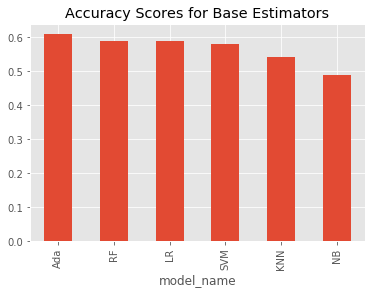

<Figure size 432x288 with 0 Axes>

In [30]:
results['accuracy'].sort_values(ascending=False).plot(kind='bar')
plt.title('Accuracy Scores for Base Estimators')
plt.figure()

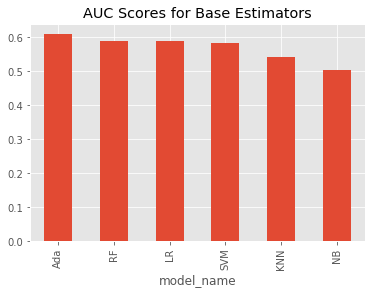

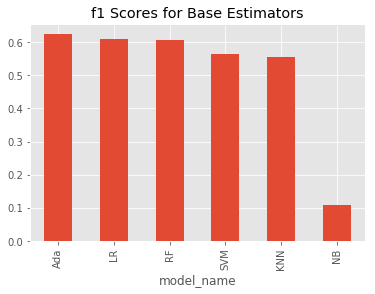

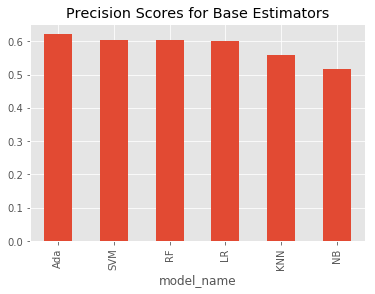

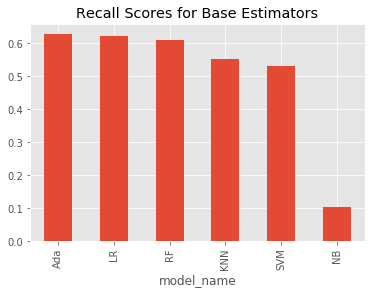

In [31]:

results['auc'].sort_values(ascending=False).plot(kind='bar')
plt.title('AUC Scores for Base Estimators')
plt.figure()
results['f1'].sort_values(ascending=False).plot(kind='bar')
plt.title('f1 Scores for Base Estimators')
plt.figure()
results['precision'].sort_values(ascending=False).plot(kind='bar')
plt.title('Precision Scores for Base Estimators')
plt.figure()
results['recall'].sort_values(ascending=False).plot(kind='bar')
plt.title('Recall Scores for Base Estimators')
plt.show()

### Model Evaluation of Question 2
Our second set of models are evaluated to answer our second question:
2. Can we build a model that classifies if the newborn was born into a low income or high income household?

In [33]:
results_muni = (model_results_muni
 .groupby(['model_name', 'score_name'])
 .agg(np.mean)
 .reset_index()
 .pivot_table(index='model_name', columns='score_name', 
              values='score_value', aggfunc=np.mean))

In [34]:
display(results_muni)

score_name,accuracy,auc,f1,precision,recall
model_name,,,,,
Ada,0.546370,0.508284,0.261339,0.464379,0.187182
KNN,0.503678,0.492259,0.412697,0.432263,0.395922
LR,0.552995,0.509894,0.220167,0.479725,0.146543
NB,0.462690,0.506275,0.583404,0.446883,0.872638
RF,0.517657,0.493843,0.346650,0.429423,0.292948
SVM,0.555945,0.499708,0.048568,0.513427,0.026170


For our second question, the accuracy results are the highest with Support Vector Machines, coming in at 55.99% with recall at 2.61%. This if followed closely by Linear Regression, with an accuracy of 55.30% and recall of 14.65%. With such low recall scores for the best performing models, we cannot rely on these models to give us accurate predictions without further parameter tuning.  

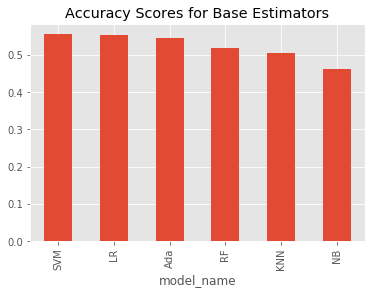

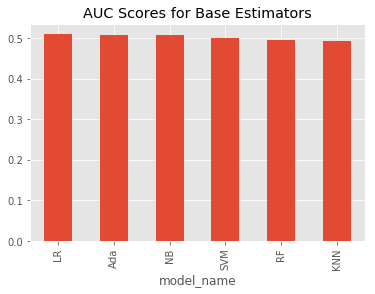

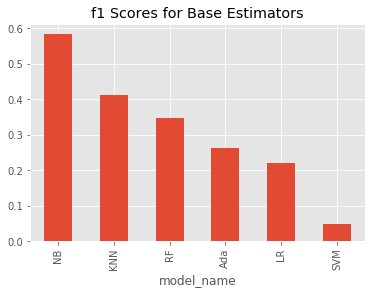

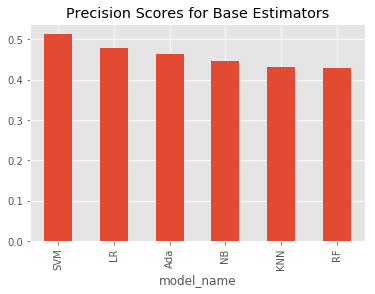

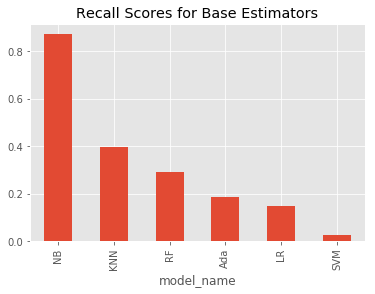

In [35]:
#Display results for muni target
results_muni['accuracy'].sort_values(ascending=False).plot(kind='bar')
plt.title('Accuracy Scores for Base Estimators')
plt.figure()
results_muni['auc'].sort_values(ascending=False).plot(kind='bar')
plt.title('AUC Scores for Base Estimators')
plt.figure()
results_muni['f1'].sort_values(ascending=False).plot(kind='bar')
plt.title('f1 Scores for Base Estimators')
plt.figure()
results_muni['precision'].sort_values(ascending=False).plot(kind='bar')
plt.title('Precision Scores for Base Estimators')
plt.figure()
results_muni['recall'].sort_values(ascending=False).plot(kind='bar')
plt.title('Recall Scores for Base Estimators')
plt.show()

## Grid Search to Optimize Models

We proceed to Grid Search optimization without Naive Bayes included due to its low recall score and lack of hyperparameters, and also without SVM due to the grid search taking an inordinate amount of time to complete.

### Grid Search for Question 1

In [36]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'KNN':{'n_neighbors':range(1,5), 'weights':['uniform', 'distance'], 'p':[1,2]},
    'RF':{'n_estimators':[50,100,150], 'min_samples_leaf':[2, 5], 'max_depth':[10, 20, 30, 50]},
    'AB':{'n_estimators':[50, 75, 100], 'learning_rate': [.8, .9, 1]},
    'LR':{'penalty':['l1', 'l2'], 'C':[1, 100, 1000]}
}

In [38]:
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(clf_knn, param_grid['KNN'], cv=10, scoring='recall').fit(X, y)


print('Best Params for KNN',knn_gscv.best_params_)
print('Best mean recall score for KNN',knn_gscv.best_score_)

Best Params for KNN {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best mean recall score for KNN 0.5450260221665139


In [39]:
#use gridsearch to test all values for n_neighbors
rf_gscv = GridSearchCV(clf_rf, param_grid['RF'], cv=10, scoring='recall').fit(X, y)


print('Best Params for RF',rf_gscv.best_params_)
print('Best mean recall score for RF',rf_gscv.best_score_)

Best Params for RF {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 150}
Best mean recall score for RF 0.652156421359106


In [40]:
#use gridsearch to test all values for n_neighbors
ada_gscv = GridSearchCV(clf_ada, param_grid['AB'], cv=10, scoring='recall').fit(X, y)


print('Best Params for AdaBoost',ada_gscv.best_params_)
print('Best mean recall score for AdaBoost',ada_gscv.best_score_)

Best Params for AdaBoost {'learning_rate': 0.8, 'n_estimators': 100}
Best mean recall score for AdaBoost 0.6445648786794971


In [41]:
#use gridsearch to test all values for n_neighbors
lr_gscv = GridSearchCV(clf_lr, param_grid['LR'], cv=10, scoring='recall').fit(X, y)

print('Best Params for Logistic Regression',lr_gscv.best_params_)
print('Best mean recall score for Logistic Regression',lr_gscv.best_score_)

Best Params for Logistic Regression {'C': 1, 'penalty': 'l1'}
Best mean recall score for Logistic Regression 0.6289446023189728


### Evaluation for Models of Question 1 after Grid Search

The Random Forest Classifier has the highest recall score with 65.21%. If there are measurable variables that are able to capture the difference accounting for exposure vs non-exposure, they are not fully captured in this dataset. 

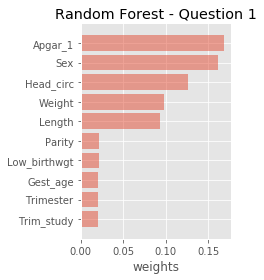

In [62]:
# top 10 important features
important_features = rf_gscv.best_estimator_.feature_importances_
feature_importance = dict(zip(list(df_lite), important_features))
feature_importance_sorted = pd.DataFrame(columns = ['variable', 'importance'])

for key in sorted(feature_importance, key = lambda l:abs(feature_importance[l]), reverse = True):
    temp = pd.DataFrame([[key, feature_importance[key]]], columns = ['variable', 'importance'])
    feature_importance_sorted = feature_importance_sorted.append(temp)
#print("Top 10 Important Features: \n", feature_importance_sorted[0:10])

labels = list(feature_importance_sorted['variable'][0:10])
importance = list(feature_importance_sorted['importance'][0:10])
y_position = np.arange(len(labels),0,-1)
plt.subplot(1,2,1)
plt.barh(y_position,importance,align='center', alpha=0.5)
plt.yticks(y_position,labels)
plt.xlabel('weights')
plt.title('Random Forest - Question 1')
plt.ylim(0,11)
plt.tight_layout()

Reviewing the Random Forest classification feature importance weight shows that the first five variables account for most of the predictive power of the classification of exposed or not exposed. We can remove the low weighted values without any significant detrimental impact to the predictive power of the Random Forest classifier. 

### Grid Search for Question 2

In [55]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
    'KNN':{'n_neighbors':range(1,5), 'weights':['uniform', 'distance'], 'p':[1,2]},
    'RF':{'n_estimators':[50,100,150], 'min_samples_leaf':[2, 5], 'max_depth':[10, 20, 30, 50]},
    'AB':{'n_estimators':[50, 75, 100], 'learning_rate': [.8, .9, 1]},
    'LR':{'penalty':['l1', 'l2'], 'C':[1, 100, 1000]}
}

In [56]:
#use gridsearch to test all values for n_neighbors
knn_gscv2 = GridSearchCV(clf_knn, param_grid['KNN'], cv=10, scoring='recall').fit(X_muni, y_muni)


print('Best Params for KNN',knn_gscv2.best_params_)
print('Best mean recall score for KNN',knn_gscv2.best_score_)

Best Params for KNN {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best mean recall score for KNN 0.4415642823595631


In [57]:
#use gridsearch to test all values for n_neighbors
rf_gscv2 = GridSearchCV(clf_rf, param_grid['RF'], cv=10, scoring='recall').fit(X_muni, y_muni)


print('Best Params for RF',rf_gscv2.best_params_)
print('Best mean recall score for RF',rf_gscv2.best_score_)

Best Params for RF {'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 50}
Best mean recall score for RF 0.27679179390463865


In [58]:
#use gridsearch to test all values for n_neighbors
ada_gscv2 = GridSearchCV(clf_ada, param_grid['AB'], cv=10, scoring='recall').fit(X_muni, y_muni)


print('Best Params for AdaBoost',ada_gscv2.best_params_)
print('Best mean recall score for AdaBoost',ada_gscv2.best_score_)

Best Params for AdaBoost {'learning_rate': 1, 'n_estimators': 100}
Best mean recall score for AdaBoost 0.21666520468637782


In [59]:
#use gridsearch to test all values for n_neighbors
lr_gscv2 = GridSearchCV(clf_lr, param_grid['LR'], cv=10, scoring='recall').fit(X_muni, y_muni)

print('Best Params for Logistic Regression',lr_gscv2.best_params_)
print('Best mean recall score for Logistic Regression',lr_gscv2.best_score_)

Best Params for Logistic Regression {'C': 100, 'penalty': 'l1'}
Best mean recall score for Logistic Regression 0.14983936491576252


### Evaluation for Problem 2

Running grid optimization on problem 2 actually decreases the recall score for most of our models. The best recall score is from the KNN model with 44.16%. This model performs worse than chance. We conclude that the dataset does not have the variables necessary to make a prediction on income levels with any confidence. We cannot select for most imporant features in KNN becuase it classifies based on euclidian geometry.

## Deployment:

Both of our questions are relevent to the deployment of resources by medical personnel, by publich health workers, and by the medical industry. The ability to predict which pregnant women will have problems with the pregnancy and the newborn after exposure to a major natural disaster such as an earthquake is important for knowing which resources need to be brought into the affected region, which individuals are in need of those resources, and how to screen for markers of the effect of the natural disaster. There is also a need to be sure that cost expenditures are commensurate with the need, and that resources are used for those in need but not outside of that need. This preserves resources for those who need them and ensures that the costs of obtaining resources are kept to what is necessary. 

For the second question, there are major concerns regarding whether a mother's socio-economic situation affects the health of the pregnancy and the newborn. If the socio-economic situation can be predicted based on specific data from the pregnancy and the newborn then resources for maternal, fetal and neonatal health can readily be directed to those who demonstrate the findings in the data set. In the models we developed we do not have sufficient information to predict either exposure to a significant earthquake (natural disaster) or predict family income (socio-economic status). Both questions require a larger data set than we have plus the collection of additional data that is not in this set. We believe that deployment of our results should be used to: 

1) design and plan studies of sufficient size to answer the questions, and 

2) emphasize that making such predictions is more complicated than many individuals think.

Additional information that we suggest be collected include maternal diseases, the occurance of premature labor, inclusion of all premature infants, not just those born after 34 weeks of gestation, inclusion of cesarean section deliveries and the reason for the cesarean section, and inclusion of fetal demise or still births.